<a href="https://colab.research.google.com/github/rominarg/Challenger_TelecomX_Parte2/blob/main/Challenger_TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo Librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

Extracción de datos

In [ ]:
df = pd.read_csv('/content/datos_limpios.csv')
df.head()

,id_cliente,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total,contas_diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.0,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0,2.796667


In [ ]:
# --- 2. Crear variable objetivo 'churn' ---
# La columna 'cancelamento' ya es 0/1
df['churn'] = df['cancelamento']

# --- 3. Identificar columnas categóricas y numéricas ---
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Excluir variable objetivo y columna original 'cancelamento'
if 'churn' in numerical_cols:
    numerical_cols.remove('churn')
if 'cancelamento' in numerical_cols:
    numerical_cols.remove('cancelamento')

print(f"Columnas categóricas: {categorical_cols}")
print(f"Columnas numéricas: {numerical_cols}")

# --- 4. One-Hot Encoding para categóricas ---
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --- 5. Escalado de columnas numéricas ---
scaler = RobustScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# --- 6. Separar X e y ---
X = df.drop('churn', axis=1)
y = df['churn']

# --- 7. Split en entrenamiento y test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nPreprocesamiento completo. Datos listos para modelado.")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

Columnas categóricas: ['id_cliente', 'servico_internet', 'seguranca_online', 'tipo_contrato', 'metodo_pagamento']
Columnas numéricas: ['genero', 'idoso', 'possui_conjuge', 'possui_dependentes', 'meses_como_cliente', 'servico_telefonico', 'multiplas_linhas', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filmes_streaming', 'fatura_online', 'custo_mensal', 'custo_total', 'contas_diarias']

Preprocesamiento completo. Datos listos para modelado.
X_train: (5813, 7292), X_test: (1454, 7292)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7267 non-null   object 
 1   cancelamento          7267 non-null   int64  
 2   genero                7267 non-null   int64  
 3   idoso                 7267 non-null   int64  
 4   possui_conjuge        7267 non-null   int64  
 5   possui_dependentes    7267 non-null   int64  
 6   meses_como_cliente    7267 non-null   int64  
 7   servico_telefonico    7267 non-null   int64  
 8   multiplas_linhas      7267 non-null   int64  
 9   servico_internet      7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   int64  
 12  protecao_dispositivo  7267 non-null   int64  
 13  suporte_tecnico       7267 non-null   int64  
 14  tv_streaming          7267 non-null   int64  
 15  filmes_streaming     

Limpieza y Procesamiento de los Datos

In [ ]:
col = 'account_Charges_Total'

if col in df.columns:
    # 1. Convertir a numérico
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # 2. Calcular la mediana e imputar valores faltantes
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

    # 3. Verificar valores nulos
    print(f"Valores nulos restantes en '{col}': {df[col].isnull().sum()}")
else:
    print(f"⚠️ La columna '{col}' no existe. Columnas disponibles: {df.columns.tolist()}")

⚠️ La columna 'account_Charges_Total' no existe. Columnas disponibles: ['id_cliente', 'cancelamento', 'genero', 'idoso', 'possui_conjuge', 'possui_dependentes', 'meses_como_cliente', 'servico_telefonico', 'multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filmes_streaming', 'tipo_contrato', 'fatura_online', 'metodo_pagamento', 'custo_mensal', 'custo_total', 'contas_diarias']


Conversion de variable Churn

In [ ]:
# Convertir Yes/No a 1/0
df['churn'] = df['cancelamento'].map({'Yes': 1, 'No': 0})
print(df['cancelamento'].unique())

[0 1]


In [ ]:
target = 'churn'  # asegurate que coincide con tu DataFrame

# Columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Excluir variable objetivo
if target in numerical_cols:
    numerical_cols.remove(target)

print(f"\nColumnas categóricas identificadas: {categorical_cols}")
print(f"Columnas numéricas identificadas: {numerical_cols}")



Columnas categóricas identificadas: ['id_cliente', 'servico_internet', 'seguranca_online', 'tipo_contrato', 'metodo_pagamento']
Columnas numéricas identificadas: ['cancelamento', 'genero', 'idoso', 'possui_conjuge', 'possui_dependentes', 'meses_como_cliente', 'servico_telefonico', 'multiplas_linhas', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filmes_streaming', 'fatura_online', 'custo_mensal', 'custo_total', 'contas_diarias']


Analisis de Correlación

Top 5 variables más correlacionadas con churn: ['contas_diarias', 'custo_mensal', 'fatura_online', 'idoso', 'tv_streaming']


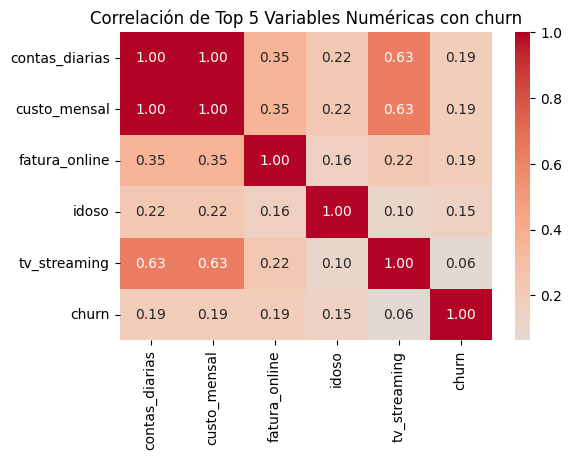

In [ ]:
# Calcular correlación con churn
corr_with_churn = df[numerical_cols + ['churn']].corr()['churn'].sort_values(ascending=False)

# Seleccionar top 5 variables más correlacionadas (omitimos 'churn')
top5_vars = corr_with_churn.index[1:6].tolist()
print("Top 5 variables más correlacionadas con churn:", top5_vars)

# Heatmap solo de esas 5 variables + churn
plt.figure(figsize=(6,4))
sns.heatmap(df[top5_vars + ['churn']].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlación de Top 5 Variables Numéricas con churn")
plt.show()
